In [1]:
#Please make sure to download accompanying .csv file export_dataframe_afterJSON.csv, Thanks!
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random
import json
import numpy.random

In [2]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aruns\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aruns\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aruns\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aruns\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
!pip install pyLDAvis==2.1.1

In [4]:
!pip install yellowbrick

In [5]:
from gensim import corpora
import pickle
import gensim
import pyLDAvis.gensim

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from collections import defaultdict
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from yellowbrick.cluster import InterclusterDistance
from scipy.cluster.hierarchy import ward, dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import *

In [7]:
np.random.seed(450)

In [8]:
max_rows = None
max_cols = None
pd.set_option("display.max_rows", max_rows, "display.max_columns", max_cols)

### Loading COVID-19 data from csv file

In [9]:
# load the meta data from the CSV file with relevant columns
df=pd.read_csv('metadata.csv', usecols=['title','abstract','authors','doi','publish_time','sha','source_x','url'])
print (df.shape)

(45774, 8)


In [10]:
df.head(10)

,sha,source_x,title,doi,abstract,publish_time,authors,url
0,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,https://doi.org/10.1101/001727
1,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,https://doi.org/10.1101/003889
2,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,https://doi.org/10.1101/006866
3,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,https://doi.org/10.1101/007476
4,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,https://doi.org/10.1101/010389
5,c41fdb2efd6d61384a92a84cbba3f8233629a41b,biorxiv,The infant airway microbiome in health and dis...,10.1101/012070,The nasopharynx (NP) is a reservoir for microb...,2014-12-02,Shu Mei Teo; Danny Mok; Kym Pham; Merci Kusel;...,https://doi.org/10.1101/012070
6,1dd898b5ca1ae70ec0e3cad89fc87a165002a99e,biorxiv,Using heterogeneity in the population structur...,10.1101/017178,"ABSTRACTIn 2013, U.S. swine producers were con...",2015-03-27,Eamon B. O’Dea; Harry Snelson; Shweta Bansal,https://doi.org/10.1101/017178
7,33565294e6bc67fb7ee14dcae6cfdb08148f4ea5,biorxiv,"Big city, small world: Density, contact rates,...",10.1101/018481,Macroscopic descriptions of populations common...,2015-04-27,Moritz U. G. Kraemer; T. Alex Perkins; Derek A...,https://doi.org/10.1101/018481
8,3461d71f6890f7e5ba53bf168be3945cdb16d901,biorxiv,MERS-CoV recombination: implications about the...,10.1101/020834,Recombination is a process that unlinks neighb...,2015-06-12,Gytis Dudas; Andrew Rambaut,https://doi.org/10.1101/020834
9,1f9d3f9a1a0e8db6a086e0a2b5ba50cf9f235dae,biorxiv,On the causes of evolutionary transition:trans...,10.1101/027722,A pattern in which nucleotide transitions are ...,2015-09-28,Arlin Stoltzfus; Ryan W. Norris,https://doi.org/10.1101/027722


In [11]:
# Code to clean the dataframe from FinalProjectstarter

#drop duplicates
df = df.drop_duplicates(subset='abstract', keep="first")
df.reset_index(drop = 'True', inplace = True)

#drop NANs 
df=df.dropna()

# convert abstracts to lowercase
df["abstract"] = df["abstract"].str.lower()

#show 10 lines of the new dataframe
print (df.shape)
df.head(10)

(27527, 8)


,sha,source_x,title,doi,abstract,publish_time,authors,url
0,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,https://doi.org/10.1101/001727
1,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,an emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,https://doi.org/10.1101/003889
2,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,germline variation at immunoglobulin gene (ig)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,https://doi.org/10.1101/006866
3,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,https://doi.org/10.1101/007476
4,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,https://doi.org/10.1101/010389
5,c41fdb2efd6d61384a92a84cbba3f8233629a41b,biorxiv,The infant airway microbiome in health and dis...,10.1101/012070,the nasopharynx (np) is a reservoir for microb...,2014-12-02,Shu Mei Teo; Danny Mok; Kym Pham; Merci Kusel;...,https://doi.org/10.1101/012070
6,1dd898b5ca1ae70ec0e3cad89fc87a165002a99e,biorxiv,Using heterogeneity in the population structur...,10.1101/017178,"abstractin 2013, u.s. swine producers were con...",2015-03-27,Eamon B. O’Dea; Harry Snelson; Shweta Bansal,https://doi.org/10.1101/017178
7,33565294e6bc67fb7ee14dcae6cfdb08148f4ea5,biorxiv,"Big city, small world: Density, contact rates,...",10.1101/018481,macroscopic descriptions of populations common...,2015-04-27,Moritz U. G. Kraemer; T. Alex Perkins; Derek A...,https://doi.org/10.1101/018481
8,3461d71f6890f7e5ba53bf168be3945cdb16d901,biorxiv,MERS-CoV recombination: implications about the...,10.1101/020834,recombination is a process that unlinks neighb...,2015-06-12,Gytis Dudas; Andrew Rambaut,https://doi.org/10.1101/020834
9,1f9d3f9a1a0e8db6a086e0a2b5ba50cf9f235dae,biorxiv,On the causes of evolutionary transition:trans...,10.1101/027722,a pattern in which nucleotide transitions are ...,2015-09-28,Arlin Stoltzfus; Ryan W. Norris,https://doi.org/10.1101/027722


### Motivation & problem statement

Currently, there is an ongoing global effort from the academic fraternity & pharmaceutical industry in racing towards a vaccine for COVID-19, with success in succesfully isolating the SARS-CoV-2 virus that causes COVID-19. Several clinical trials and experiments are underway in varying stages but a vaccine has not been discovered yet. 

Since this issue is one of utmost urgency and importance, I will tentatively be choosing the problem of using Machine Learning to come up with insights regarding potential vaccines & therapuetics to aid the scientific community. 

### Exploratory Data Analysis using Latent Dirichlet Association Topic Modelling

#### Pre-processing text for LDA classfication

The first step would be to classify the content of each paper based on key-words to get an idea of overall trends in literature. We can do this by searching the title for a set of keywords. Let us start with cleaning the title column by removing stop words and punctuations to distil to the core concept of each title.

In [12]:
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

In [13]:
def clean_text(text):
    
    #Tokenize the text into words
    word_tokens = word_tokenize(text)
    
    #convert text into lowercase
    word_tokens = [word.lower() for word in word_tokens]
    
    #remove punctuation signs from tokens
    table = str.maketrans('', '', string.punctuation)
    word_tokens = [word.translate(table) for word in word_tokens]
    
    #remove stopwords
    stop_words = set(stopwords.words('english')) #import a predefined set of stopwords from the nltk package
    word_tokens = [word for word in word_tokens if not word in stop_words]
    
    #lemmatization of words (express in base form)
    word_tokens = [get_lemma(word) for word in word_tokens]
    
    clean_text = [] #create empty list to store the final tokens after text processing
    for w in word_tokens:
        clean_text.append(w)
    
    clean_text_str = ' '.join(clean_text)
    
    #return the clean text string and the token list for LDA
    return clean_text_str  , clean_text

In [14]:
cleanTitleList = []

for title in df['title']:
    cleanedTitle, TitleTokens = clean_text(title)
    cleanTitleList.append(cleanedTitle)
    
df['clean_title'] = cleanTitleList

In [15]:
cleanAbstractList = []
AbstractTokenList = []

for abstract in df['abstract']:
    cleanedAbstract, AbstractTokens = clean_text(abstract)
    cleanAbstractList.append(cleanedAbstract)
    AbstractTokenList.append(AbstractTokens)

df['clean_abstract'] = cleanAbstractList

In [16]:
def generateWordCloud(strInput):
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white',  
                    min_font_size = 10).generate(strInput) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = 'black') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

#### Generating a Word Cloud to visualize the text before classifying into categories

In [17]:
title_StringForWC = ""
for text in df['clean_title']:
    for word in text:
        title_StringForWC = title_StringForWC + word

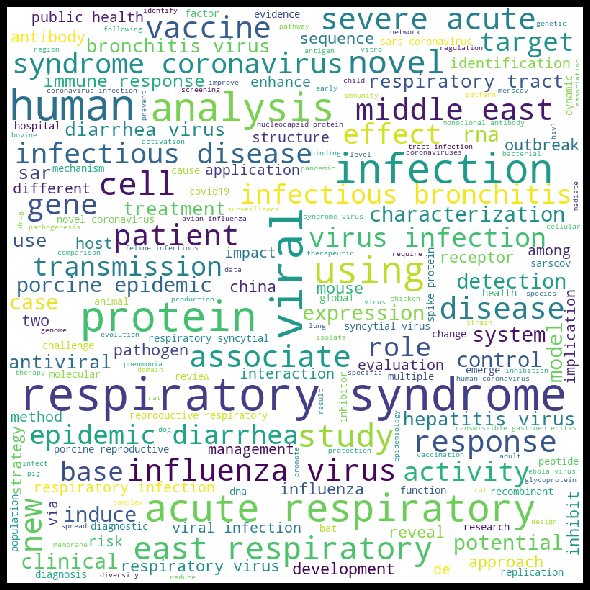

In [18]:
 generateWordCloud(title_StringForWC)

#### Visualizing word cloud of cleaned abstract

In [20]:
abstract_StringForWC = ""
for text in df['clean_abstract']:
    for word in text:
        abstract_StringForWC = abstract_StringForWC + word

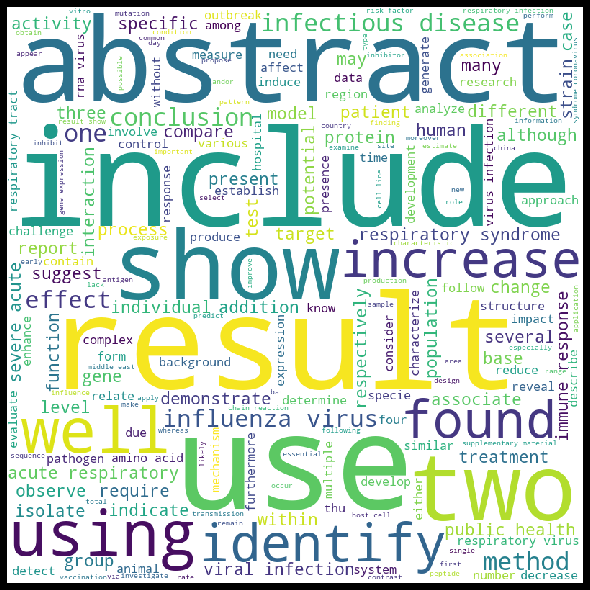

In [21]:
generateWordCloud(abstract_StringForWC)

In [22]:
# Removing null characters from AbstractTokenList and saving it in a new list
AbstractTokensList = []
for x in AbstractTokenList:
    x = list(filter(lambda y: y != '', x))
    AbstractTokensList.append(x)

#### Classifying articles based on Latent Dirichlet Association (LDA)

LDA is an unsupervised Machine Learning method of topic modelling. LDA allows us to group relevant words into topics and express documents as a mixed distributions of topics. LDA assumes that topics can be represented by a Dirichlet distribution of words and documents can be represented as a Dirichlet distribution of topics.

In [23]:
# Creating a corpus of bag of words from the abstract tokens
dictionary = corpora.Dictionary(AbstractTokensList)
corpus = [dictionary.doc2bow(text) for text in AbstractTokensList]

In [24]:
#Saving the corpus and gensim dictionary
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [25]:
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')

In [26]:
topics = ldamodel.print_topics(num_words = 9)
for topic in topics:
    print(topic)

(0, '0.013*"disease" + 0.011*"health" + 0.006*"outbreak" + 0.005*"use" + 0.005*"model" + 0.005*"study" + 0.005*"infectious" + 0.005*"infection" + 0.005*"case"')
(1, '0.020*"patient" + 0.015*"respiratory" + 0.013*"infection" + 0.011*"virus" + 0.008*"study" + 0.007*"clinical" + 0.007*"p" + 0.006*"child" + 0.006*"influenza"')
(2, '0.013*"virus" + 0.010*"protein" + 0.009*"rna" + 0.007*"viral" + 0.006*"sequence" + 0.006*"use" + 0.006*"abstract" + 0.005*"structure" + 0.005*"assay"')
(3, '0.026*"cell" + 0.014*"virus" + 0.013*"infection" + 0.010*"viral" + 0.009*"protein" + 0.009*"response" + 0.007*"immune" + 0.007*"mouse" + 0.006*"expression"')
(4, '0.016*"virus" + 0.010*"strain" + 0.010*"antibody" + 0.009*"coronavirus" + 0.008*"sarscov" + 0.008*"calf" + 0.007*"protein" + 0.007*"study" + 0.006*"abstract"')


#### Visualizing the topic clusters through intertopic distance maps (Interactive)

In [27]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

In [28]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\aruns\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]
C:\Users\aruns\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


#### List of topics 
Topic 1: Epidemiology and Transmision
<br> Topic 2: Symptoms and risk factors
<br> Topic 3: Molecular biology and viral pathogenesis (virus entry, replication & spread) 
<br> Topic 4: Immune response to virus and vaccination
<br> Topic 5: Virology and diagnostics

#### Assigning topics to each document based on LDA model

Each document deals with a number of topics and with the help of LDA, we can put numbers on the composition of topics in each documents. I proceed to pick out key topics and use primary and secondary topics for data visualization.

In [29]:
df.reset_index(drop = 'True', inplace = True)

In [30]:
probList = []
for i in range(27527):    
    probList.append(ldamodel.get_document_topics(corpus[i]))

In [31]:
df['Topic 1'] = pd.Series()
df['Topic 1'] = pd.to_numeric(df['Topic 1'])
df['Topic 2'] = pd.Series()
df['Topic 2'] = pd.to_numeric(df['Topic 2'])
df['Topic 3'] = pd.Series()
df['Topic 3'] = pd.to_numeric(df['Topic 3'])
df['Topic 4'] = pd.Series()
df['Topic 4'] = pd.to_numeric(df['Topic 4'])
df['Topic 5'] = pd.Series()
df['Topic 5'] = pd.to_numeric(df['Topic 5'])

In [32]:
df['Row Index'] = df.index

In [33]:
def doc_probability(row, t):
    for (x, y) in probList[row['Row Index']]:
        if (x == t):
            return y

In [34]:
for t in range(5):    
    df['Topic %d' %(t+1)] = df.apply(lambda row: doc_probability(row,t), axis = 1)

In [35]:
### Display topic probabilities
df[['Topic 1','Topic 2','Topic 3', 'Topic 4', 'Topic 5']].head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,NaN,NaN,0.965259,NaN,0.029193
1,0.955556,NaN,NaN,0.037605,NaN
2,NaN,NaN,0.732229,NaN,0.263126
3,0.237979,NaN,0.757659,NaN,NaN
4,0.764845,NaN,0.149857,NaN,0.082567


In [36]:
df['Key Topics'] = pd.Series()

In [37]:
#Based on probability of each topic, assign primary (and/or secondary) topics for each document
def assign_topic(row):
    
    rowObj = pd.Series()
    
    rowObj = row[['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5']]
    rowObj = rowObj.apply(pd.to_numeric, errors = 'coerce')
    max_prob = rowObj.max()
    maxValueIndex = rowObj.idxmax(skipna = True)
    
    colList = ['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5']
    if(max_prob >= 0.80):
        return maxValueIndex
    else:
        colList.remove(maxValueIndex)
        rowObj = row[colList]
        rowObj = rowObj.apply(pd.to_numeric, errors = 'coerce')
        second_max_prob = rowObj[colList].max()
        second_maxValueIndex = rowObj[colList].idxmax(skipna = True)
        return maxValueIndex, second_maxValueIndex

In [38]:
df['Key Topics'] = df.apply(lambda row: assign_topic(row), axis = 1)

In [39]:
df[['Topic 1','Topic 2','Topic 3', 'Topic 4', 'Topic 5','Key Topics']].head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Key Topics
0,NaN,NaN,0.965259,NaN,0.029193,Topic 3
1,0.955556,NaN,NaN,0.037605,NaN,Topic 1
2,NaN,NaN,0.732229,NaN,0.263126,"(Topic 3, Topic 5)"
3,0.237979,NaN,0.757659,NaN,NaN,"(Topic 3, Topic 1)"
4,0.764845,NaN,0.149857,NaN,0.082567,"(Topic 1, Topic 3)"


C:\Users\aruns\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\aruns\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3629., 2285., 1681., 1249., 1027.,  842.,  676.,  568.,  492.,
         409.]),
 array([0.01000507, 0.10855274, 0.20710041, 0.30564808, 0.40419576,
        0.50274343, 0.6012911 , 0.69983877, 0.79838644, 0.89693412,
        0.99548179]),
 <a list of 10 Patch objects>)

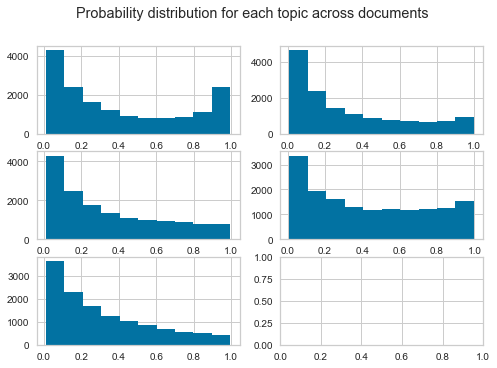

In [40]:
# Let's take a quick look at the probability distributions across topics. 
fig, ax = plt.subplots(3,2)
fig.suptitle('Probability distribution for each topic across documents')

ax[0, 0].hist(df['Topic 1'])
ax[0, 1].hist(df['Topic 2'])
ax[1, 0].hist(df['Topic 3'])
ax[1, 1].hist(df['Topic 4'])
ax[2, 0].hist(df['Topic 5'])

In [41]:
def primary_topic(row):
    
    if(type(row['Key Topics']) == tuple):
        return row['Key Topics'][0]
    else:
        return row['Key Topics']

In [42]:
def secondary_topic(row):
    if(type(row['Key Topics']) == tuple):
        return row['Key Topics'][1]
    else :
        return 

In [43]:
df['Primary Topic'] = pd.Series()

In [44]:
df['Primary Topic'] = df.apply(lambda row: primary_topic(row), axis = 1)

In [45]:
df['Secondary Topic'] = pd.Series()

In [46]:
df['Secondary Topic'] = df.apply(lambda row: secondary_topic(row), axis = 1)

Text(0, 0.5, 'Number of articles')

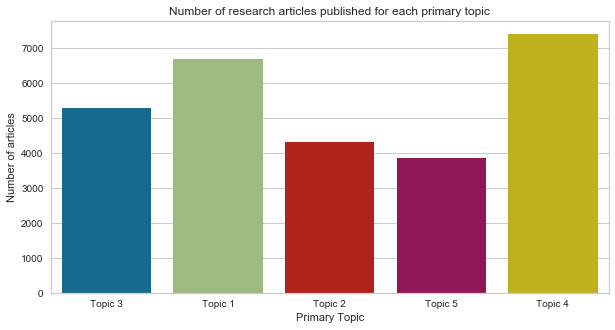

In [47]:
fig= plt.figure(figsize=(10,5))
ax = plt.axes()
sns.countplot(x="Primary Topic", data=df)
ax.set_title('Number of research articles published for each primary topic')
plt.ylabel('Number of articles')

We are paticulary interested in Topics 4: Immune response to virus and vaccination and Topic 3: Molecular biology and viral pathogenesis (virus entry, replication & spread) since they are crucial to providing insights about vaccines. Topic 4 articles are 7000 in number and Topic 3 articles are over 5000 in number. Let's quickly examine the secondary topic distribution for topics 4 and 3.

In [48]:
small_df = df[df['Primary Topic'] == 'Topic 4']
small_df_2 = df[df['Primary Topic'] == 'Topic 3']
df_forsec = pd.concat([small_df,small_df_2])

Text(0, 0.5, 'Number of articles')

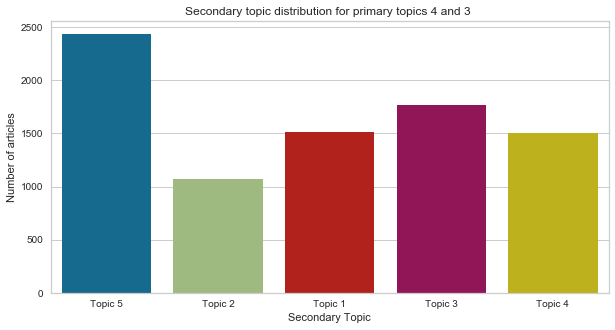

In [49]:
fig= plt.figure(figsize=(10,5))
ax = plt.axes()
sns.countplot(x = "Secondary Topic", data = df_forsec)
ax.set_title('Secondary topic distribution for primary topics 4 and 3 ')
plt.ylabel('Number of articles')

We note that Topic 5 occurs most frequently with topics 4 and 3 and this makes sense since Topic 5 is about Virology and detection.

In [50]:
df['Year of publishing'] = df['publish_time'].str[:4]

In [51]:
pub_date_df = df.groupby(['Year of publishing', 'Primary Topic'])['title'].count().unstack()

([<matplotlib.axis.XTick at 0x18da53a1e48>,
 <a list of 51 Text xticklabel objects>)

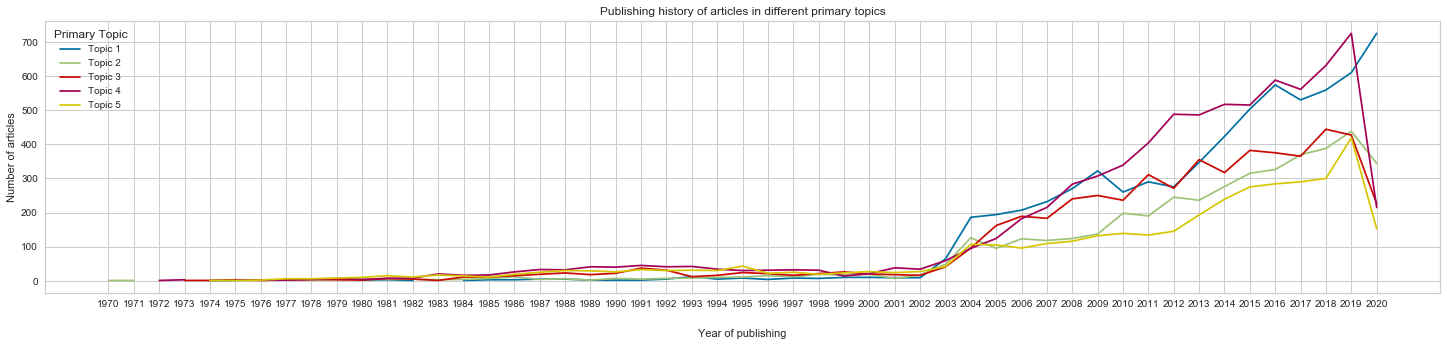

In [52]:
fig= plt.figure(figsize=(25,5))
ax = plt.axes()
pub_date_df.plot(kind = 'line', ax = ax)
ax.set_title('Publishing history of articles in different primary topics')
plt.ylabel('Number of articles')
ax.set_xlabel(xlabel = 'Year of publishing', labelpad = 20)
plt.xticks(range(0,len(pub_date_df.index)), pub_date_df.index)

We can see that the research surrounding COVID-19 has been on a steep upward trend sine 2003. This can be attributed to the SARS outbreak in 2003, which has given the community a deep well of information and data regarding the coronavirus class of pandemics, enabling them to push the frontiers of research. There is a slight dip in 2020 but this is only due to the fact that we are only three months into 2020. Several papers on COVID-19 have been fast-tracked and accelerated in the peer review process and have been made aailable to the community but still await official publication. The scientific community is poised to enhance the body of literature around this class of viruses even more this year.

While the entire corpus of scientific literature is a rich resource of information, when it comes to tackling the problem of coming up with insights for developing therapeutics and vaccines in the fight against COVID-19, we are particularly interested in Topic 4: Immune response to virus and vaccination and Topic 3: Molecular biology and viral pathogenesis (virus entry, replication & spread). So, we will be using these articles, around 12000 in number. This significantly reduces the text of corpus and makes for a closer examination of selected article to obtain more focussed insights.

In [53]:
#Create a new dataframe for the selected documents that belong to Topic 4 and Topic 3
df_ML = df_forsec
df_ML.drop(columns = ['Topic 1', 'Topic 2', 'Topic 3','Topic 4','Topic 5'], inplace = True)

#### Parsing JSON file for full text of documents of interest (Topics 4 and 3)

We do this so as to improve the keyword based feature engineering method. Searching the keywords through a bigger bag will allow us to gain more insights about potential therapeutics and vaccines. 

In [54]:
#### Parsing document full text from JSON for new dataframe df_ML
# fullTextList_forDF = []
# for index, row in df_ML.iterrows():
#     if(';' in row['sha']):
#         split_string = row['sha'].split(';')
#         json_filepath = split_string[0]
#     else:
#         json_filepath = row['sha']
#     textStr = ''
#     with open(r'C:\Users\aruns\Documents\UniversityOfToronto\UniversityOfToronto\Winter2020\MIE1624IntroToDataScience\FinalMiniProject\biorxiv_medrxiv\biorxiv_medrxiv\%s.json' %(json_filepath)) as json_file:
#         data = json.load(json_file)
#         for roller in data['body_text']:
#             in_text = roller['text']
#             textStr = textStr + in_text
#     fullTextList_forDF.append(textStr)


In [55]:
# df_ML['full text'] = fullTextList_forDF

In [239]:
# df_ML.to_csv (r'export_dataframe_afterJSON.csv', index = False, header=True)

In [243]:
# df_ML.head()

,sha,source_x,title,doi,abstract,publish_time,authors,url,clean_title,clean_abstract,Row Index,Key Topics,Primary Topic,Secondary Topic,full text,clean full text,knn_clustering
0,8cfb8dfc2f8b2c6e1d60ff48da02de6670694869,biorxiv,Productive infection of field strains of avian...,10.1101/041558,the avian coronavirus infectious bronchitis vi...,2016-02-26,Yueting Zhang; Gary Whittaker,https://doi.org/10.1101/041558,productive infection field strain avian corona...,avian coronavirus infectious bronchitis virus ...,12,"('Topic 4', 'Topic 5')",Topic 4,Topic 5,Avian infectious bronchitis virus (IBV) is the...,avian infectious bronchitis virus ibv protot...,6
1,1c0b25c8e3c89243fd8797e2e964e12689bc8556,biorxiv,50-valent inactivated rhinovirus vaccine is br...,10.1101/053967,abstractas the predominant etiological agent o...,2016-05-17,Sujin Lee; Minh Trang Nguyen; Michael G. Curri...,https://doi.org/10.1101/053967,50valent inactivate rhinovirus vaccine broadly...,abstractas predominant etiological agent commo...,17,"('Topic 4', 'Topic 2')",Topic 4,Topic 2,HRV causes respiratory illness in billions of ...,hrv cause respiratory illness billion people a...,4
2,53442eacc3f233078507fa37b78267399e8c1e3b,biorxiv,Dysregulation of Long Non-coding RNA (lncRNA) ...,10.1101/061788,abstractzika virus (zikv) is a causative agent...,2016-07-01,Arunachalam Ramaiah; Deisy Contreras; Vineela ...,https://doi.org/10.1101/061788,dysregulation long noncoding rna lncrna gene...,abstractzika virus zikv causative agent poor...,19,Topic 4,Topic 4,NaN,"The human mosquito-borne pathogen, Zika Virus ...",human mosquitoborne pathogen zika virus zikv...,3
3,44a440cc1c135c938d2216ea672f8ef4f9c01296,biorxiv,Genome-wide Prediction of microRNAs in Zika vi...,10.1101/070656,abstractzika virus (zikv) is a member of the f...,2016-08-21,Juan Cristina; Natalia Echeverría; Fabiana Gam...,https://doi.org/10.1101/070656,genomewide prediction micrornas zika virus gen...,abstractzika virus zikv member family flaviv...,25,"('Topic 4', 'Topic 1')",Topic 4,Topic 1,Zika virus (ZIKV) is a member of the family Fl...,zika virus zikv member family flaviviridae ...,7
4,28b107243576723248ad4053261000311a22f134,biorxiv,"Genetic, transcriptome, proteomic and epidemio...",10.1101/080333,abstractmultiple pathogens have been detected ...,2016-10-12,C.J. Carter,https://doi.org/10.1101/080333,genetic transcriptome proteomic epidemiologi...,abstractmultiple pathogen detect alzheimer ’ d...,30,"('Topic 4', 'Topic 3')",Topic 4,Topic 3,"i c , a n t i f u n g a l o r a n t i v i r a ...",c n f u n g l r n v r l h e r p ccbyncnd 40 ...,8


In [242]:
df_ML = pd.read_csv((r'export_dataframe_afterJSON.csv'))

In [107]:
#Cleaning up the full text 
cleanedTextTokensList = []
cleanedFullTextList = []
for text in df_ML['full text']:
    cleanedFullText, cleanedTextTokens = clean_text(text)
    cleanedFullTextList.append(cleanedFullText)
    cleanedTextTokensList.append(cleanedTextTokens) 
df_ML['clean full text'] = cleanedFullTextList

## Implementing Unsupervised Machine Learning Clustering approaches

The objective of the Machine Learning model will be to gain insights on potential vaccines and therapies through a clustering approach. The motivation is that treatments, vaccines and therapies that occur frequently across documents could be potential candidates for vaccination. Also, upon clustering these therapuetics into multiple clusters, we can also explore certain "combination therapies" that rely on mix-and-match strategies from different cluster. The potential for further analysis is great and so, this is the strategy I will proceed with.

### Feature Engineering

#### Keyword based word frequency and TF-IDF
The high dimensionality of TF-IDF and Word2Vec vectors can prove to be problematic while implementing unsupervised clustering algorithms. To reduce dimensionality and eliminate noise from the data, I'll also be implementing a keyword-based feature selection routine as follows. I will be making a list of key-words related to the topics under consideration (microbiology, immune response, vaccination, etc.)

In [57]:
concepts = ['binding domain','spike','protein','immune response','pathogen','inhibit','gene','sequence','rna','virus','pathogen','viral replication','host cell','cell line', 'peptide','pathway','produce',
            'inhibition','inhibitor','binding','activation','rna virus','pathogen','amino acid',
    'combination therapy', 'protease inhibitors', 'protease inhibition', 'rna therapy', 'target endocytosis','spike protein','chloroquine phosphate','arbidol'
           'rbd','receptor binding domain','hr2p','ek1','couple spike protein','antibody therapy','ifn-alpha','favilavi','regeneron','mrna-1273','target genome','genome','supress inflammatory response'
           'corticosteroids','crispr','cas13','covalescent plasma','recombinant influenza','adenoviral vector','moelcular clamp','dna-based vaccine','inactivated vaccine']
vaccines = ['nonreplicating viral vector','adenovirus type 5 vector', 'ad5-ncov', 'mrna 1273', 'lipid nanoparticles','mrna vaccine','vaccine']
antibodies = ['monoclonal antibodies','substitute antibodies','antobodies','actemra','rheumatoid arthritis','interleukin-6','IL-6','avastin','vegf blocker', 'cytokine rush',' granulocyte-macrophage colony-stimulating factor'
              'gimsilumab','kevzara','leronlimab','CCR5 receptor','inflammatory cytokines','pd-1 blocking antibody','pd-1 block','mmune checkpoints inhibitors',
              'sylvant','siltuximab','tjm2','pro-inflammatory cytokine','gm-csf']
antivirals = ['azvudine','favilavir','favipiravir','t-705','avigan','protease inhibitors','asc09','ganovo','ritonavir','kaletra','aluvia','lopinavir',
'prezcobix','darunavir','prezcobix','pharmokinetic enhancer','remdisivir','broad-spectrum antiviral','antiviral','truvada','emtricitabine','tenofovir',
'pre-exposure prophylaxis','xofluza','baloxavir marboxil']
cellular_therapies = ['cellular therapy','t-cell','car t-cell','mesenchymal stem cells','msc','pneumonitis','multipotent adult progenitor cells','mapc','ards']
misc = ['angiotensin-converting enzyme 2','ace2','ace2 deactivation','apn01','rhACE2','chloroquine','Hydroxychloroquine']
viruses = ['sars cov','sars cov 2','mers']

In [58]:
keyword_bag = concepts + vaccines + antibodies + antivirals + cellular_therapies + misc + viruses

{'binding domain': 0, 'spike': 0, 'protein': 0, 'immune response': 0, 'pathogen': 0, 'inhibit': 0, 'gene': 0, 'sequence': 0, 'rna': 0, 'virus': 0, 'viral replication': 0, 'host cell': 0, 'cell line': 0, 'peptide': 0, 'pathway': 0, 'produce': 0, 'inhibition': 0, 'inhibitor': 0, 'binding': 0, 'activation': 0, 'rna virus': 0, 'amino acid': 0, 'combination therapy': 0, 'protease inhibitors': 0, 'protease inhibition': 0, 'rna therapy': 0, 'target endocytosis': 0, 'spike protein': 0, 'chloroquine phosphate': 0, 'arbidolrbd': 0, 'receptor binding domain': 0, 'hr2p': 0, 'ek1': 0, 'couple spike protein': 0, 'antibody therapy': 0, 'ifn-alpha': 0, 'favilavi': 0, 'regeneron': 0, 'mrna-1273': 0, 'target genome': 0, 'genome': 0, 'supress inflammatory responsecorticosteroids': 0, 'crispr': 0, 'cas13': 0, 'covalescent plasma': 0, 'recombinant influenza': 0, 'adenoviral vector': 0, 'moelcular clamp': 0, 'dna-based vaccine': 0, 'inactivated vaccine': 0, 'nonreplicating viral vector': 0, 'adenovirus type

C:\Users\aruns\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\aruns\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


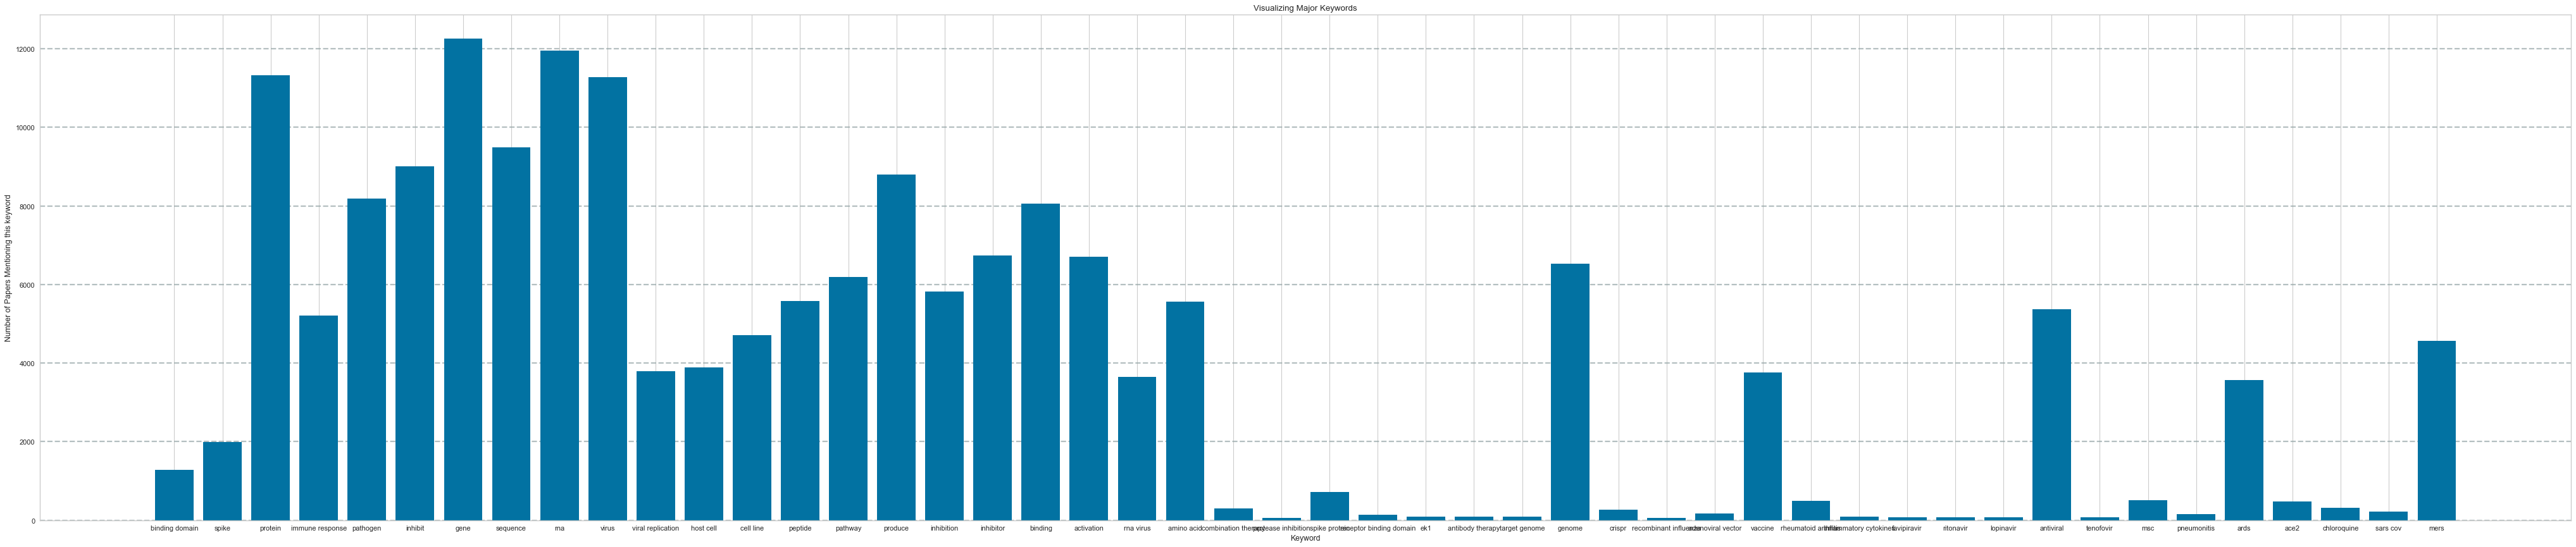

In [73]:
keyword_count = dict((keyword,0) for keyword in keyword_bag)

for keyword in keyword_count:
    for full_text in df_ML['clean full text']:
        if str(keyword) in full_text:
            keyword_count[keyword] += 1

#Only if a keyword has a frequency of greater than 50, will we consider it significant for analysis, so as to reduce dimensionality
keywordList = []
new_keyword_count = {}
for key,val in keyword_count.items():
    if(val >= 50):
        new_keyword_count[key] = val
        keywordList.append(key)

loc = np.arange(len(new_keyword_count))
width = 0.35

fig = plt.figure(num=None, constrained_layout=True, figsize=(50, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

ax.bar(new_keyword_count.keys(),new_keyword_count.values())
ax.set_xticks(loc, tuple(keyword_bag))

ax.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax.set_ylabel('Number of Papers Mentioning this keyword')
ax.set_xlabel('Keyword')
ax.set_title('Visualizing Major Keywords')
plt.show()

In [74]:
#We will mine the full text using keywords and vectorize & transform to reduce dimensionality of tf-idf matrix

pipe = Pipeline([('count', CountVectorizer(vocabulary=keywordList)),('tfid', TfidfTransformer())]).fit(cleanedFullTextList)
pipe.named_steps['count'].transform(cleanedFullTextList).toarray()
pipe.named_steps['tfid'].idf_
tf_idf_vec_reduced_dim = pipe.transform(cleanedFullTextList)

### Model Implementation

I will be displaying implementation on multiple models to determine which works best for the COVID-19 data.

#### k-Means clustering

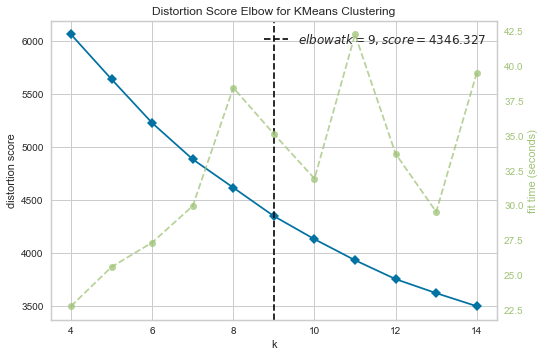

In [212]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,15))

visualizer.fit(tf_idf_vec_reduced_dim)      # Fit the data to the visualizer
visualizer.show()   

From the elbow method, we see that the optimal value of k for K Means clustering is 9.

In [233]:
num_clusters = 9
kMeansModel = KMeans(n_clusters = num_clusters)

In [234]:
pred_y = kMeansModel.fit_predict(tf_idf_vec_reduced_dim)

In [235]:
clusters = kMeansModel.labels_.tolist()

In [236]:
df_ML['knn_clustering'] = clusters

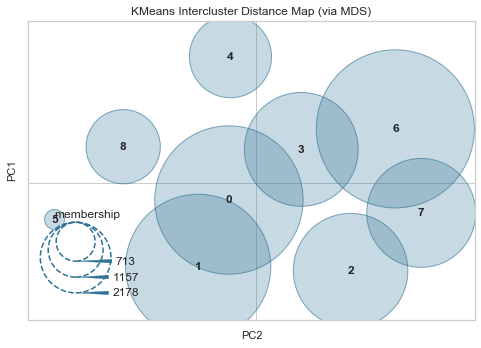

In [237]:
visualizer = InterclusterDistance(kMeansModel)
visualizer.fit(tf_idf_vec_reduced_dim)        # Fit the data to the visualizer
visualizer.show()

The inter-tropic distance clustering map indicates that the clusters seem to cover a wide spread of text data and also indicates some overlap between clusters. The size of the clusters in the inter-tropic distance maps indicates the relative importance of the clusters and we can see that clusters 0, 6 and 1 are the biggest and hence most important in terms of document frequency occurence.

In [238]:
silhouette_score(tf_idf_vec_reduced_dim, labels=kMeansModel.predict(tf_idf_vec_reduced_dim))

0.23041569871091563

A silhouette score is a method of evaluating k-Means clustering in unsupervised ML. Scores closer to one mean that there is less overlap, scores closer to zero indicate significant overlap and negative scores indicate wrong clustering. In our case, the algorithm clusters the text properly but there is some overlap, and this is to be expected since many documents deal with overlapping concepts. 

#### Hierarchical Clustering

In [75]:
#Initialize the distance matrix with zeroes 
keyword_dist = np.zeros((len(keywordList),len(keywordList)), dtype=float)
df_keyword = pd.DataFrame(keyword_dist, columns=keywordList, index=keywordList)

In [76]:
#Function to calculate cumulative distance between two keywords
def cumulative_dist(keyword1, keyword2, df_func):
    cum_sum = 0
    number_of_papers = 0
    if keyword1 == keyword2: 
        return 0
    
    for text in df_func['clean full text']:
        if ((keyword1 in text) and (keyword2 in text)):
            number_of_papers += 1
            cum_sum -= 1
        elif (((keyword1 in text) and (keyword2 not in text)) or ((keyword1 not in text) and (keyword2 in text))):
            number_of_papers += 1
            cum_sum += 1
    
    return cum_sum/(number_of_papers+0.0000001)

In [77]:
#Populate Matrix of symptom distances by mining the text of the papers found in the database and using the distance rule as
#For a keyword A and B mentioned in a paper together the distanceA_B += 1 
# or distanceA_B -= 1 if they are not mentioned together
for i in range(len(keywordList)):
    for j in range(len(keywordList)):
         keyword_dist[i][j] = cumulative_dist(keywordList[i],keywordList[j], df_ML)    

In [78]:
i = 0
for keyword in keywordList:
    df_keyword[keyword] = np.power(keyword_dist[i],9)
    i += 1
print('Our distance matrix looks like this:')   
df_keyword

Our distance matrix looks like this:


,binding domain,spike,protein,immune response,pathogen,inhibit,gene,sequence,rna,virus,viral replication,host cell,cell line,peptide,pathway,produce,inhibition,inhibitor,binding,activation,rna virus,amino acid,combination therapy,protease inhibition,spike protein,receptor binding domain,ek1,antibody therapy,target genome,genome,crispr,recombinant influenza,adenoviral vector,vaccine,rheumatoid arthritis,inflammatory cytokines,favipiravir,ritonavir,lopinavir,antiviral,tenofovir,msc,pneumonitis,ards,ace2,chloroquine,sars cov,mers
binding domain,0.000000,2.761950e-12,9.742429e-10,2.453419e-09,6.542954e-09,3.416983e-10,6.096758e-09,1.110936e-10,5.928976e-09,3.570664e-09,1.687740e-10,2.599967e-13,3.458008e-09,1.008835e-12,8.885767e-11,2.501258e-09,1.822071e-10,9.693376e-11,2.842855e-14,3.339304e-10,6.366402e-10,1.637026e-14,0.033901,0.428467,5.160447e-09,1.249727e-09,0.115310,0.113835,0.555542,6.340616e-11,0.005620,0.203786,0.050410,3.603383e-08,0.002959,0.303324,0.206719,0.619441,4.306309e-01,1.657758e-09,5.502691e-01,0.006892,0.227871,1.955432e-08,2.142254e-08,0.053469,0.002006,3.748002e-11
spike,0.051963,0.000000e+00,8.568267e-15,1.340714e-10,2.488508e-14,3.892220e-13,4.275829e-14,2.225464e-15,2.754874e-14,2.987713e-15,1.435205e-11,1.440795e-16,1.654524e-12,1.182436e-14,3.880788e-10,9.450569e-14,2.657033e-11,7.690708e-12,2.472326e-15,3.943991e-11,2.388530e-13,1.627246e-15,0.091436,0.326995,3.287625e-46,3.346620e-04,0.283969,0.282578,0.117034,1.920929e-16,0.032596,0.255963,0.044810,2.685626e-14,0.011637,0.359215,0.531586,0.328613,2.794339e-01,7.308851e-11,3.868596e-01,0.006132,0.098277,6.261498e-10,9.348543e-11,0.010915,0.000511,1.248861e-16
protein,0.099710,2.735194e-02,0.000000e+00,6.749113e-72,-1.879851e-49,-1.395386e-32,-1.033426e-09,-9.925121e-27,-2.247963e-11,-1.150035e-15,8.935998e-37,5.328842e-39,6.074903e-53,9.097670e-113,-1.292686e-115,-1.221404e-38,4.673634e-101,-4.135081e-89,-2.341163e-38,-1.371739e-85,5.109161e-32,2.951467e-104,0.014493,0.404234,1.573725e-05,1.260944e-01,0.254236,0.277332,0.330794,-4.782346e-105,0.019787,0.410088,0.082334,1.958156e-34,0.000742,0.277332,0.370760,0.370727,3.706943e-01,1.426249e-67,4.414859e-01,0.000998,0.117466,6.311021e-30,1.023579e-03,0.012272,0.040529,5.636278e-46
immune response,0.110486,7.999030e-02,1.236342e-08,0.000000e+00,8.759317e-144,2.018691e-58,2.445439e-65,1.080162e-51,1.952620e-62,4.703953e-68,2.777255e-36,1.182726e-29,2.669268e-33,1.322370e-41,8.605246e-64,2.777155e-65,5.887456e-38,8.926942e-37,4.678301e-51,6.735944e-107,2.239076e-22,2.573749e-29,0.005092,0.555953,5.036009e-05,1.214267e-01,0.225377,0.094781,0.422231,8.257750e-37,0.015677,0.287533,0.011424,2.911136e-49,0.000020,0.088841,0.238499,0.476300,4.616011e-01,1.724773e-51,3.711951e-01,0.000995,0.034856,2.078220e-22,5.613301e-03,0.012491,0.057008,5.222510e-23
pathogen,0.123209,3.079198e-02,-3.854905e-06,1.272679e-16,0.000000e+00,-1.162923e-82,-1.088222e-42,-7.054070e-78,-6.524693e-46,-1.286651e-42,4.701882e-39,1.386495e-38,8.138547e-43,2.213454e-46,1.289496e-87,-9.273760e-77,4.525127e-59,8.237363e-73,1.327520e-153,-1.274743e-135,1.861485e-32,1.930733e-42,0.010317,0.480491,3.959011e-05,1.158025e-01,0.243567,0.194519,0.183362,1.183108e-86,0.016873,0.327985,0.062973,1.438383e-40,0.000205,0.182979,0.291058,0.385826,4.264662e-01,2.723126e-66,3.860510e-01,0.001034,0.054220,2.251930e-27,1.553455e-03,0.012032,0.059086,7.109948e-34
inhibit,0.088753,4.179584e-02,-2.887497e-04,3.885547e-07,-7.873581e-10,0.000000e+00,-9.071471e-33,-3.354125e-66,-1.298835e-32,-1.607902e-38,6.682499e-41,8.618595e-40,7.255078e-57,6.917234e-73,-1.098377e-95,-1.698955e-67,-6.928571e-44,-2.781280e-25,-6.833910e-56,-7.689073e-75,2.728406e-29,4.059782e-59,0.004082,0.313564,5.469370e-05,1.261206e-01,0.184550,0.230123,0.496594,4.985629e-68,0.018783,0.405181,0.084245,2.112666e-29,0.000236,0.238778,0.271009,0.266021,2.810985e-01,1.256893e-128,2.518915e-01,0.001053,0.093962,1.055206e-28,4.530194e-04,0.003365,0.033339,6.134905e-40
gene,0.122246,3.270076e-02,

In [79]:
distance = np.power(keyword_dist,9)  #Magnify the distance prior to HCA
#distance

Y = sch.linkage(distance, method='centroid')

Text(0.5, 1.0, 'Dendrogram Displaying COVID-19 therapeutics and vaccination clusters')

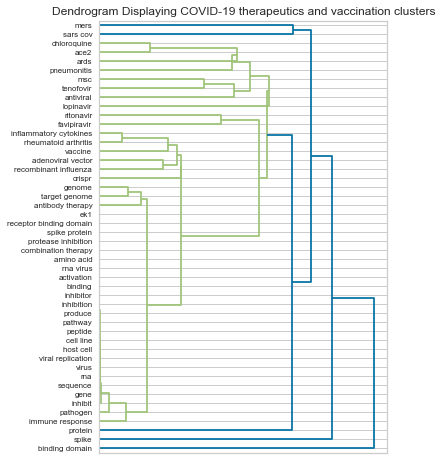

In [223]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

# Get dendrograms
Z1 = sch.dendrogram(Y, orientation='right')

ax1.set_xticks([])
ax1.set_yticklabels(keywordList)
ax1.set_title("Dendrogram Displaying COVID-19 therapeutics and vaccination clusters")

The dendrogram provides valuable information about potential combinations for therapuetics and vaccines. Chloroquine and ace2 frequently occur together. Lopinavir, Ritonavir and Favipiravir are antivirals that are under consideration and this has been confirmed by the dendrogram. Potential strategies on the microbiology side include attacking/replicating the binding domain of the spike protein and this is crucial when it comes to immune response. Rightly so, we see that spike protein and binding domain have been highlighted by the dendrogram.

#### DB-Scan

In [199]:
db = DBSCAN(eps=0.4, min_samples=100).fit(tf_idf_vec_reduced_dim)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f" % silhouette_score(tf_idf_vec_reduced_dim, labels))

Estimated number of clusters: 6
Estimated number of noise points: 4702
Silhouette Coefficient: 0.088


Text(0.5, 1.0, '2D Cluster Map for DBScan Clustering ')

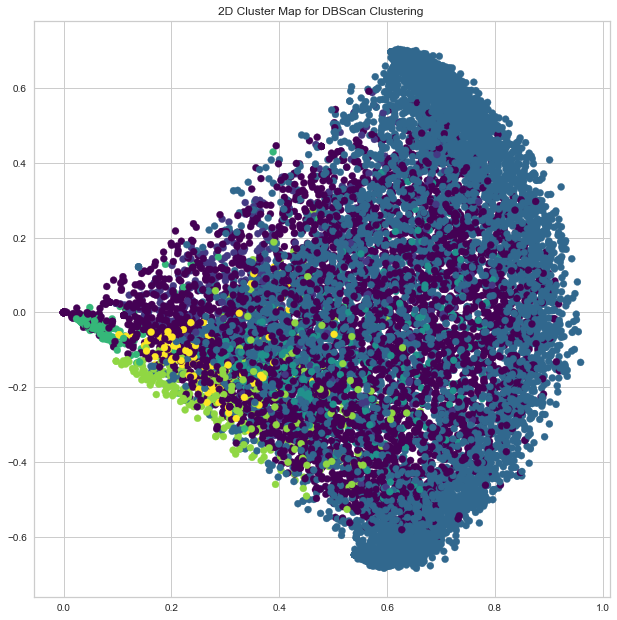

In [232]:
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_axes([0.4,0.4,0.8,0.8])
pca = TruncatedSVD(n_components=2)
reduced_features = pca.fit_transform(tf_idf_vec_reduced_dim.toarray())
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=labels,  cmap='viridis')
ax.set_title("2D Cluster Map for DBScan Clustering ")

From the projected 2D figure and silhouette coefficient (0.088), we can see that there this a significant overlap of the six clusters.

#### Implementing LDA on full text to get insights
Now that we have a larger and richer text resource after parsing the JSON files of documents with primary topics as Topics 4 and 3, we can now do a deep dive LDA to see if we can get valuable insights using the LDA unsupervised ML method.

In [153]:
cleanedTextTokensList_ready = []
for x in cleanedTextTokensList:
    x = list(filter(lambda y: y not in ['','doiorg101101061788','93','2c','8h','sec','ml'], x))
    cleanedTextTokensList_ready.append(x)

In [154]:
# Creating a corpus of bag of words from the full text tokens
dictionary2 = corpora.Dictionary(cleanedTextTokensList_ready)
corpus2 = [dictionary.doc2bow(text) for text in cleanedTextTokensList_ready]

In [155]:
pickle.dump(corpus2, open('corpus2.pkl', 'wb'))
dictionary.save('dictionary2.gensim')

In [156]:
NUM_TOPICS = 6
ldamodel = gensim.models.ldamodel.LdaModel(corpus2, num_topics = NUM_TOPICS, id2word=dictionary2, passes=15)
ldamodel.save('model6.gensim')

In [157]:
topics = ldamodel.print_topics(num_words = 15)
for topic in topics:
    print(topic)

(0, '0.014*"bone" + 0.010*"virion" + 0.009*"independent" + 0.008*"chpmbcs" + 0.007*"blood" + 0.006*"9" + 0.006*"viremia" + 0.005*"adherent" + 0.005*"http" + 0.005*"multinucleated" + 0.005*"combine" + 0.005*"e2f" + 0.004*"6" + 0.004*"highly" + 0.004*"exceed"')
(1, '0.009*"modest" + 0.008*"94" + 0.008*"exceed" + 0.006*"combine" + 0.006*"upon" + 0.006*"viruscontaining" + 0.006*"antagonize" + 0.005*"subsequence" + 0.005*"cal99" + 0.004*"chpmbcs" + 0.004*"viremia" + 0.004*"complete" + 0.004*"mock" + 0.004*"cytoplasm" + 0.004*"cpneumoniae"')
(2, '0.029*"serious" + 0.017*"micrornas" + 0.012*"superscript" + 0.011*"driving" + 0.008*"log" + 0.007*"disease" + 0.007*"rrnas" + 0.006*"communityacquired" + 0.006*"virion" + 0.005*"long" + 0.005*"chicken" + 0.004*"present" + 0.004*"cal99" + 0.004*"significantly" + 0.004*"3a"')
(3, '0.024*"serious" + 0.010*"virion" + 0.009*"subsequence" + 0.009*"combine" + 0.008*"betaamyloid" + 0.008*"viremia" + 0.008*"exceed" + 0.008*"samplesdna" + 0.007*"modest" + 0.0

In [158]:
#dictionary2 = gensim.corpora.Dictionary.load('dictionary2.gensim')
corpus2 = pickle.load(open('corpus2.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model6.gensim')

In [159]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus2, dictionary2, sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\aruns\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]
C:\Users\aruns\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


The LDA clustering provides a deep dive insight into research articles and provides key insights on terms and approaches of interest
Terms such as viremia,  transgutminase and e2f seem to be linked with virology and microbiology and so will provide greater insight to researchers and domain experts

## Insights & Discussion

#### Promising Approaches
Approaches that exploit binding of spike protein with ACE2 using recombinant ACE2 are also proving to show promise in the scientific community currently. Targeting virus interaction with ACE2 is crucial to preventing virus entry into cell. RNA-based vaccines are also under consideration in the fight against COVID-19. Gilead's Remdesivir, Favilavi, Roche's Actemra and Moderna's mRNA are commercial drugs that are in various stages of clinical trials. Excessive immmune response triggered by a "cytokine rush" can prove to aggrevate the disease in those affected and so, cytokine response needs to be inhibited by targeting the IL-6 receptor and this is an approach that is under consideration as well. Convalescent Plasma Therapy could be an avenue if enough people recover from COVID-19 and their covalescent plasma can be obtained from blood samples.

#### Insights from Unsupervised Clustering Models
Hierarchical clustering provides rich insight on potential therapeutics & vaccines
<br> 1. Chloroquine known to facilitate zinc entry into coronavirus and then prevent replication
<br> 2. Lopinavir, Ritonavir, Favipiravir and Tenofovir (anti-HIV) are potential antivirals that are in advanced stages of clinical trials currently and are expected to be effective in the fight against COVID-19. These drugs work on the principle of protease inhibition that is key to disrupting the replication of virus in the human cell. 
<br> 3. CRISPR, Adenoviral Vector and Recombinant Influenza are approaches for vaccines that are currently in consideration. CRISPR is a method of targeting genome sequences to fight the SARS-CoV-2 virus. 
<br> 4. Antibody therapy and genome sequencing look promising as potential treatments to COVID-19.

The LDA clustering provides a deep dive insight into research articles and provides key insights on terms and approaches of interest
Terms such as viremia,  transgutminase and e2f seem to be linked with virology and microbiology and so will provide greater insight to researchers and domain experts

#### Core contribution

Core contribution involves clustering of multiple potential therapies and providing a quick and easy LDA pipeline for scientists/researches to quickly gain insights from a large corpus of text data.This will greatly aid in the research effort since this will provide quick and relevant searches to researchers who wish to go through a large corpus of text to pick out key documents and concepts of interest.

